In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Digit Recognizer/train.csv')
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
temp = df.sample()
temp

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9707,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


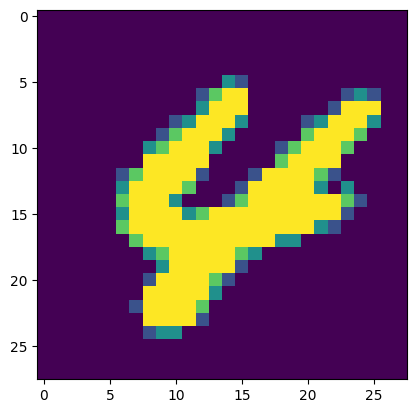

In [11]:
plt.imshow(df.iloc[9707 , 1:].values.reshape(28,28))

In [13]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

x.shape ,y.shape

((42000, 784), (42000,))

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [19]:
start = time.time()

y_pred = knn.predict(x_test)
time.time() - start

23.234716653823853

In [22]:
accuracy_score(y_test , y_pred) * 100

96.48809523809524

### without PCA
96.48 % accuracy with 784 features

In [23]:
from sklearn.decomposition import PCA

In [25]:
# n_components is used to tell how much column do you want
pca = PCA(n_components = None)

x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [27]:
knn = KNeighborsClassifier()
knn.fit(x_train_new , y_train)
start = time.time()

y_pred = knn.predict(x_test_new)
print('time taken to predict : ',time.time() - start)
print('accuracy score : ',accuracy_score(y_test , y_pred) * 100)

time taken to predict :  22.657432556152344
accuracy score :  96.48809523809524


same answer when n_components is None means actual columns

In [28]:
pca = PCA(n_components = 100)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_new , y_train)
start = time.time()
y_pred = knn.predict(x_test_new)
print('time taken to predict : ',time.time() - start)
print('accuracy score : ',accuracy_score(y_test , y_pred) * 100)

time taken to predict :  5.408824920654297
accuracy score :  96.94047619047619


### with PCA
96.94 % accuracy with 100 features

In [59]:
n_components = []
time_taken = []
accuracy = []

for i in range(1,100) :
  pca = PCA(n_components = i)
  x_train_new = pca.fit_transform(x_train)
  x_test_new = pca.transform(x_test)

  knn = KNeighborsClassifier()
  knn.fit(x_train_new , y_train)
  start = time.time()
  y_pred = knn.predict(x_test_new)

  n_components.append(i)
  time_taken.append(time.time() - start)
  accuracy.append(accuracy_score(y_test , y_pred))



dic = {
    'n_components' : n_components,
    'time taken in prediction' : time_taken,
    'accuracy_score': accuracy
}
new_df = pd.DataFrame(dic)
new_df.to_csv('result metric.csv', index = False)

In [38]:
new_df

,n_components,time taken in prediction,accuracy_score
0,1,0.764924,0.272976
1,2,0.425699,0.422381


# Visualization

In [40]:
# transforming into 2D co ordinate system
pca = PCA(n_components = 2 )

x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [43]:
import plotly.express as px
y_train_new = y_train.astype(str)

fig = px.scatter(
   x = x_train_new[:,0],
   y = x_train_new[:,1] ,
   color = y_train_new ,
   color_discrete_sequence = px.colors.qualitative.G10
)

fig.show()

In [44]:
# finding optimum component for PCA
pca = PCA(n_components = None )

x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [47]:
pca.explained_variance_.shape

(784,)

In [49]:
pca.components_.shape

(784, 784)

784 eigen vectors

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

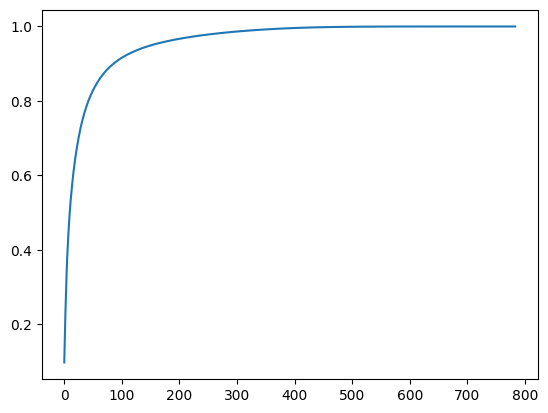

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))